In [24]:
import pandas as pd

train = pd.read_csv("C:/Users/hu612/Desktop/School/sooda/Project/팀과제/민수서영우철/data/stk_hld_train.csv")
test = pd.read_csv("C:/Users/hu612/Desktop/School/sooda/Project/팀과제/민수서영우철/data/stk_hld_test.csv")
cus = pd.read_csv("C:/Users/hu612/Desktop/School/sooda/Project/팀과제/민수서영우철/data/cus_info.csv")
iem = pd.read_csv("C:/Users/hu612/Desktop/School/sooda/Project/팀과제/민수서영우철/data/iem_info_20210902.csv")
hist = pd.read_csv("C:/Users/hu612/Desktop/School/sooda/Project/팀과제/민수서영우철/data/stk_bnc_hist.csv")
submission = pd.read_csv("C:/Users/hu612/Desktop/School/sooda/Project/팀과제/민수서영우철/data/sample_submission.csv")

In [28]:
import numpy as np
train["hist_d"] = train["hold_d"]*0.6
train.hist_d = np.trunc(train["hist_d"])

In [29]:
train.columns

Index(['act_id', 'iem_cd', 'byn_dt', 'hold_d', 'hist_d'], dtype='object')

In [30]:
train

,act_id,iem_cd,byn_dt,hold_d,hist_d
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,20180726,11,6.0
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005930,20180131,80,48.0
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005070,20180517,5,3.0
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A003520,20201112,22,13.0
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A002310,20180905,324,194.0
...,...,...,...,...,...
681467,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A260660,20180831,1,0.0
681468,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A271980,20201027,1,0.0
681469,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A289080,20181121,1,0.0
681470,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A307930,20200214,1,0.0


In [31]:
train_data = pd.merge(train, cus, how = "left", on = ["act_id"])
train_data = pd.merge(train_data, iem, how = "left", on = ["iem_cd"])

test_data = pd.merge(test, cus, how = "left", on = ["act_id"])
test_data = pd.merge(test_data, iem, how = "left", on = ["iem_cd"])

In [32]:
print(train.shape)
print(train_data.shape)

print(test.shape) # sample_submission이 포함되어 있다.
print(test_data.shape)

(681472, 5)
(681472, 18)
(70596, 6)
(70596, 19)


In [52]:
test_data

,act_id,iem_cd,byn_dt,hist_d,submit_id,hold_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A032640,20200522,153,IDX00001,0,1,9,3,2,2,9,5,5,8,LG유플러스,4,1,1
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A160600,20190823,335,IDX00002,0,1,9,3,2,2,9,5,5,8,이큐셀,10,3,99
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A234340,20200611,139,IDX00003,0,1,9,3,2,2,9,5,5,8,세틀뱅크,13,2,99
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A131760,20200120,236,IDX00004,0,1,9,3,2,2,9,5,5,8,파인텍,13,3,99
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A293490,20201217,9,IDX00005,0,1,9,3,2,2,9,5,5,8,카카오게임즈,13,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70591,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A000810,20201127,23,IDX70592,0,1,6,0,5,2,5,3,5,2,삼성화재,2,1,1
70592,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A005945,20200731,103,IDX70593,0,1,6,0,5,2,5,3,5,2,NH투자증권우,2,99,99
70593,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A004740,20170704,858,IDX70594,0,1,4,4,2,2,3,4,3,8,보루네오가구,14,3,99
70594,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A001630,20201215,11,IDX70595,0,1,4,4,2,2,3,4,3,8,종근당홀딩스,8,2,99


In [34]:
train_data['iem_krl_nm'].unique().shape # 엄청나네 labelencoding 쓸 것

(2780,)

In [35]:
train_data.isnull().sum()

act_id                  0
iem_cd                  0
byn_dt                  0
hold_d                  0
hist_d                  0
sex_dit_cd              0
cus_age_stn_cd          0
ivs_icn_cd              0
cus_aet_stn_cd          0
mrz_pdt_tp_sgm_cd       0
lsg_sgm_cd              0
tco_cus_grd_cd          0
tot_ivs_te_sgm_cd       0
mrz_btp_dit_cd          0
iem_krl_nm              0
btp_cfc_cd              0
mkt_pr_tal_scl_tp_cd    0
stk_dit_cd              0
dtype: int64

In [36]:
train_data.corr(method='spearman')

,byn_dt,hold_d,hist_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd
byn_dt,1.000000,-0.116926,-0.117317,0.037952,-0.089407,-0.035309,0.007733,0.012778,-0.079624,0.000105,-0.390369,-0.039158,-0.020771,-0.074276,-0.044741
hold_d,-0.116926,1.000000,0.996857,0.045810,-0.020726,0.037023,0.095405,0.031722,-0.013337,-0.049126,0.040282,-0.001339,-0.023331,-0.062687,-0.086372
hist_d,-0.117317,0.996857,1.000000,0.045872,-0.020808,0.037021,0.095247,0.031600,-0.013249,-0.049130,0.040306,-0.001165,-0.023242,-0.062231,-0.085933
sex_dit_cd,0.037952,0.045810,0.045872,1.000000,0.040283,0.005511,-0.025869,-0.007100,0.157892,0.077932,-0.080534,0.007446,-0.006086,-0.035280,-0.026677
cus_age_stn_cd,-0.089407,-0.020726,-0.020808,0.040283,1.000000,0.112196,0.236191,-0.042702,0.870308,-0.225983,0.251123,0.026743,0.009228,-0.038464,-0.030021
ivs_icn_cd,-0.035309,0.037023,0.037021,0.005511,0.112196,1.000000,0.041533,-0.029718,0.105534,-0.030502,0.054722,-0.017749,-0.006605,-0.022178,-0.017343
cus_aet_stn_cd,0.007733,0.095405,0.095247,-0.025869,0.236191,0.041533,1.000000,0.036781,0.240262,-0.845494,0.212786,0.001363,0.005154,-0.049224,-0.051567
mrz_pdt_tp_sgm_cd,0.012778,0.031722,0.031600,-0.007100,-0.042702,-0.029718,0.036781,1.000000,-0.039668,-0.055601,-0.008996,0.011681,-0.002069,-0.013488,-0.026426
lsg_sgm_cd,-0.079624,-0.013337,-0.013249,0.157892,0.870308,0.105534,0.240262,-0.039668,1.000000,-0.214103,0.208974,0.028671,0.004970,-0.035458,-0.027357
tco_cus_grd_cd,0.000105,-0.049126,-0.049130,0.077932,-0.225983,-0.030502,-0.845494,-0.055601,-0.214103,1.000000,-0.249847,-0.009605,-0.009456,0.036869,0.036509


<AxesSubplot:>

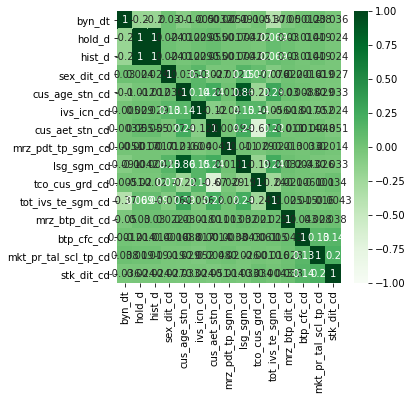

In [37]:
#heatmap으로 상관관계를 표시
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(train_data.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [12]:
train_data.to_csv("train_data.csv")

In [38]:
train_data.columns

Index(['act_id', 'iem_cd', 'byn_dt', 'hold_d', 'hist_d', 'sex_dit_cd',
       'cus_age_stn_cd', 'ivs_icn_cd', 'cus_aet_stn_cd', 'mrz_pdt_tp_sgm_cd',
       'lsg_sgm_cd', 'tco_cus_grd_cd', 'tot_ivs_te_sgm_cd', 'mrz_btp_dit_cd',
       'iem_krl_nm', 'btp_cfc_cd', 'mkt_pr_tal_scl_tp_cd', 'stk_dit_cd'],
      dtype='object')

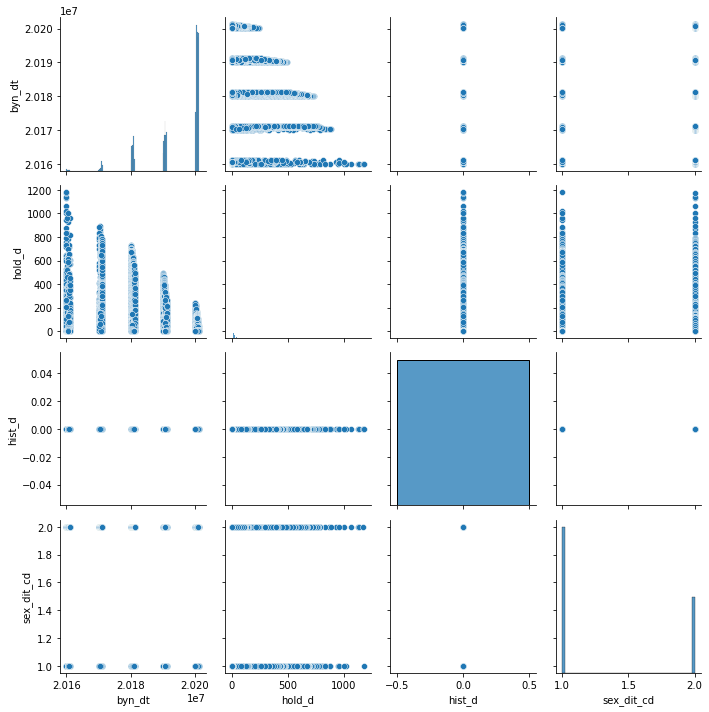

In [20]:
import seaborn as sns
cols = ['act_id', 'iem_cd', 'byn_dt', 'hold_d', 'hist_d', 'sex_dit_cd']
#        'cus_age_stn_cd', 'ivs_icn_cd', 'cus_aet_stn_cd', 'mrz_pdt_tp_sgm_cd',
#        'lsg_sgm_cd', 'tco_cus_grd_cd', 'tot_ivs_te_sgm_cd', 'mrz_btp_dit_cd',
#        'iem_krl_nm', 'btp_cfc_cd', 'mkt_pr_tal_scl_tp_cd', 'stk_dit_cd']
sns.pairplot(train_data[cols])
plt.tight_layout()
plt.show()

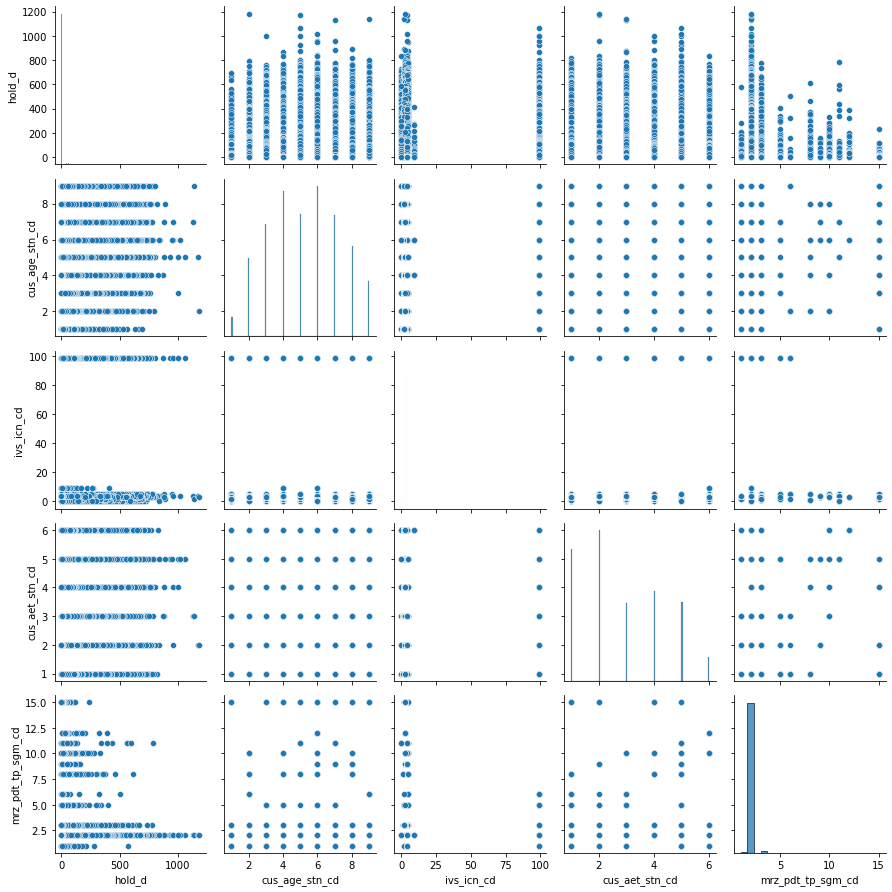

In [21]:
import seaborn as sns
# cols = ['act_id', 'iem_cd', 'byn_dt', 'hold_d', 'hist_d', 'sex_dit_cd']
cols1 =['hold_d','cus_age_stn_cd', 'ivs_icn_cd', 'cus_aet_stn_cd', 'mrz_pdt_tp_sgm_cd']
#        'lsg_sgm_cd', 'tco_cus_grd_cd', 'tot_ivs_te_sgm_cd', 'mrz_btp_dit_cd',
#        'iem_krl_nm', 'btp_cfc_cd', 'mkt_pr_tal_scl_tp_cd', 'stk_dit_cd']
sns.pairplot(train_data[cols1])
plt.tight_layout()
plt.show()

In [39]:
train_data_corr.values

array([[ 1.00000000e+00, -1.16925568e-01,             nan,
         3.79516981e-02, -8.94065345e-02, -3.53088246e-02,
         7.73273576e-03,  1.27780960e-02, -7.96235301e-02,
         1.05051815e-04, -3.90368920e-01, -3.91580587e-02,
        -2.07707671e-02, -7.42756112e-02, -4.47409912e-02],
       [-1.16925568e-01,  1.00000000e+00,             nan,
         4.58097176e-02, -2.07257263e-02,  3.70233248e-02,
         9.54046141e-02,  3.17224205e-02, -1.33369798e-02,
        -4.91255492e-02,  4.02824616e-02, -1.33884153e-03,
        -2.33306631e-02, -6.26868585e-02, -8.63716277e-02],
       [            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan],
       [ 3.79516981e-02,  4.58097176e-02,             nan,
         1.00000000e+00,  4.02828282e-02,  5.51100029

연속형 같은 범주형들이 엄청 많네 .. ㅎ

## 독립 변수 사이 다중 공선성 파악

In [43]:
train_data_ind = train_data[['act_id', 'iem_cd', 'byn_dt', 'hist_d', 'sex_dit_cd',
       'cus_age_stn_cd', 'ivs_icn_cd', 'cus_aet_stn_cd', 'mrz_pdt_tp_sgm_cd',
       'lsg_sgm_cd', 'tco_cus_grd_cd', 'tot_ivs_te_sgm_cd', 'mrz_btp_dit_cd',
       'iem_krl_nm', 'btp_cfc_cd', 'mkt_pr_tal_scl_tp_cd', 'stk_dit_cd']]

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()
train_data_corr = train_data_ind.corr(method='spearman')
vif["VIF Factor"] = [variance_inflation_factor(train_data_corr.values, i) for i in range(train_data_corr.shape[1])]
vif["features"] = train_data_corr.columns
vif

,VIF Factor,features
0,2.124624,byn_dt
1,1.223324,hist_d
2,1.776789,sex_dit_cd
3,66.137102,cus_age_stn_cd
4,1.082220,ivs_icn_cd
5,41.979781,cus_aet_stn_cd
6,1.045923,mrz_pdt_tp_sgm_cd
7,67.214753,lsg_sgm_cd
8,42.355930,tco_cus_grd_cd
9,2.977520,tot_ivs_te_sgm_cd


VIF(Variance inflation Factors 분산팽창요인)<br>
:

VIF < 5 : 안전하다<BR>
5 < VIF < 10 : 주의 <BR>
VIF > 10 : 위험하다<BR>
    

    
cus_age_stn_cd
cus_aet_stn_cd
tco_cus_grd_cd
lsg_sgm_cd
mkt_pr_tal_scl_tp_cd
stk_dit_cd   
=> 제거

In [48]:
train_data_ind_rem = train_data[['act_id', 'iem_cd', 'byn_dt', 'hist_d', 'sex_dit_cd',
        'ivs_icn_cd', 'cus_aet_stn_cd', 'mrz_pdt_tp_sgm_cd',
        'tco_cus_grd_cd', 'tot_ivs_te_sgm_cd', 'mrz_btp_dit_cd',
       'iem_krl_nm', 'btp_cfc_cd', 'mkt_pr_tal_scl_tp_cd', 'stk_dit_cd']]

In [49]:
vif = pd.DataFrame()
train_data_corr = train_data_ind_rem.corr(method='spearman')
vif["VIF Factor"] = [variance_inflation_factor(train_data_corr.values, i) for i in range(train_data_corr.shape[1])]
vif["features"] = train_data_corr.columns
vif

,VIF Factor,features
0,2.094662,byn_dt
1,1.207306,hist_d
2,1.117505,sex_dit_cd
3,1.032483,ivs_icn_cd
4,38.910402,cus_aet_stn_cd
5,1.036862,mrz_pdt_tp_sgm_cd
6,40.171591,tco_cus_grd_cd
7,2.521807,tot_ivs_te_sgm_cd
8,1.031703,mrz_btp_dit_cd
9,1.239270,btp_cfc_cd


In [50]:
train_data_ind_rem = train_data[['act_id', 'iem_cd', 'byn_dt', 'hist_d', 'sex_dit_cd',
        'ivs_icn_cd', 'cus_aet_stn_cd', 'mrz_pdt_tp_sgm_cd',
       'tot_ivs_te_sgm_cd', 'mrz_btp_dit_cd',
       'iem_krl_nm', 'btp_cfc_cd', 'mkt_pr_tal_scl_tp_cd', 'stk_dit_cd']]

vif = pd.DataFrame()
train_data_corr = train_data_ind_rem.corr(method='spearman')
vif["VIF Factor"] = [variance_inflation_factor(train_data_corr.values, i) for i in range(train_data_corr.shape[1])]
vif["features"] = train_data_corr.columns
vif

,VIF Factor,features
0,2.088766,byn_dt
1,1.162900,hist_d
2,1.044705,sex_dit_cd
3,1.029682,ivs_icn_cd
4,1.337092,cus_aet_stn_cd
5,1.019169,mrz_pdt_tp_sgm_cd
6,2.307791,tot_ivs_te_sgm_cd
7,1.030150,mrz_btp_dit_cd
8,1.239262,btp_cfc_cd
9,19.084511,mkt_pr_tal_scl_tp_cd


In [51]:
train_data_ind_rem = train_data[['act_id', 'iem_cd', 'byn_dt', 'hist_d', 'sex_dit_cd',
        'ivs_icn_cd', 'cus_aet_stn_cd', 'mrz_pdt_tp_sgm_cd',
       'tot_ivs_te_sgm_cd', 'mrz_btp_dit_cd',
       'iem_krl_nm', 'btp_cfc_cd', 'mkt_pr_tal_scl_tp_cd']]

vif = pd.DataFrame()
train_data_corr = train_data_ind_rem.corr(method='spearman')
vif["VIF Factor"] = [variance_inflation_factor(train_data_corr.values, i) for i in range(train_data_corr.shape[1])]
vif["features"] = train_data_corr.columns
vif

,VIF Factor,features
0,2.076399,byn_dt
1,1.144611,hist_d
2,1.043605,sex_dit_cd
3,1.029162,ivs_icn_cd
4,1.333666,cus_aet_stn_cd
5,1.015625,mrz_pdt_tp_sgm_cd
6,2.305657,tot_ivs_te_sgm_cd
7,1.027351,mrz_btp_dit_cd
8,1.177739,btp_cfc_cd
9,1.237258,mkt_pr_tal_scl_tp_cd


회귀 분석 계수 결정


'act_id', 'iem_cd', 'byn_dt', 'hist_d', 'sex_dit_cd',
        'ivs_icn_cd', 'cus_aet_stn_cd', 'mrz_pdt_tp_sgm_cd',
       'tot_ivs_te_sgm_cd', 'mrz_btp_dit_cd',
       'iem_krl_nm', 'btp_cfc_cd', 'mkt_pr_tal_scl_tp_cd'

## baseline 처럼 회귀 분석 진행

In [53]:
train_data_refine=train_data[['act_id', 'iem_cd', 'byn_dt', 'hist_d', 'sex_dit_cd',
        'ivs_icn_cd', 'cus_aet_stn_cd', 'mrz_pdt_tp_sgm_cd',
       'tot_ivs_te_sgm_cd', 'mrz_btp_dit_cd',
       'iem_krl_nm', 'btp_cfc_cd', 'mkt_pr_tal_scl_tp_cd','hold_d']]

test_data_refine = test_data[['act_id', 'iem_cd', 'byn_dt', 'hist_d', 'sex_dit_cd',
        'ivs_icn_cd', 'cus_aet_stn_cd', 'mrz_pdt_tp_sgm_cd',
       'tot_ivs_te_sgm_cd', 'mrz_btp_dit_cd',
       'iem_krl_nm', 'btp_cfc_cd', 'mkt_pr_tal_scl_tp_cd','submit_id','hold_d']]

In [54]:
train_label = train_data_refine["hold_d"]
train_data_refine.drop(["hold_d"], axis = 1, inplace = True)

C:\Users\hu612\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
from sklearn.preprocessing import LabelEncoder
hist["stk_p"] = hist["tot_aet_amt"] / hist["bnc_qty"]
hist = hist.fillna(0)

train_data = pd.merge(train_data_refine, hist, how = "left", on = ["act_id", "iem_cd"])
train_data = train_data[(train_data["byn_dt"] == train_data["bse_dt"])]
train_data.reset_index(drop = True, inplace = True)

test_data = pd.merge(test_data_refine, hist, how = "left", on = ["act_id", "iem_cd"])
test_data = test_data[(test_data["byn_dt"] == test_data["bse_dt"])]
test_data.reset_index(drop = True, inplace = True)

train_data = train_data.drop(["act_id", "iem_cd", "byn_dt", "bse_dt"], axis = 1)
test_data = test_data.drop(["act_id", "iem_cd", "byn_dt", "submit_id", "hold_d", "bse_dt"], axis = 1)

L_encoder = LabelEncoder()
L_encoder.fit(iem["iem_krl_nm"])
train_data["iem_krl_nm"] = L_encoder.transform(train_data["iem_krl_nm"])
test_data["iem_krl_nm"] = L_encoder.transform(test_data["iem_krl_nm"])

In [57]:
train_data.reset_index(drop = True, inplace=True)
train_label.reset_index(drop = True, inplace=True)

In [59]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from lightgbm import LGBMRegressor

models = []

folds = KFold(n_splits=5)
for train_idx, val_idx in folds.split(train_data):
    
    train_x = train_data.iloc[train_idx, :]
    train_y = train_label[train_idx]
    val_x = train_data.iloc[val_idx, :]
    val_y = train_label[val_idx]
    
    model = LGBMRegressor(objective= "regression",
                          max_depth= 6,
                          n_estimators= 2000,
                          learning_rate= 0.01,
                          num_leaves = 31)
    
    model.fit(train_x, train_y,
              eval_set=[(val_x, val_y)],
              eval_metric=["rmse"],
              early_stopping_rounds=300,
              verbose=500)
    
    models.append(model)

Training until validation scores don't improve for 300 rounds
[500]	valid_0's rmse: 3.66695	valid_0's l2: 13.4465
[1000]	valid_0's rmse: 3.53919	valid_0's l2: 12.5258
Early stopping, best iteration is:
[1026]	valid_0's rmse: 3.53874	valid_0's l2: 12.5227
Training until validation scores don't improve for 300 rounds
[500]	valid_0's rmse: 0.628487	valid_0's l2: 0.394996
[1000]	valid_0's rmse: 0.44363	valid_0's l2: 0.196808
Early stopping, best iteration is:
[911]	valid_0's rmse: 0.443161	valid_0's l2: 0.196391
Training until validation scores don't improve for 300 rounds
[500]	valid_0's rmse: 0.530031	valid_0's l2: 0.280933
[1000]	valid_0's rmse: 0.400163	valid_0's l2: 0.16013
Early stopping, best iteration is:
[1014]	valid_0's rmse: 0.400159	valid_0's l2: 0.160127
Training until validation scores don't improve for 300 rounds
[500]	valid_0's rmse: 0.439322	valid_0's l2: 0.193004
[1000]	valid_0's rmse: 0.380285	valid_0's l2: 0.144617
Early stopping, best iteration is:
[1057]	valid_0's rms

In [60]:
result = []
for i in models:
    result.append(i.predict(test_data))
predict = np.mean(result, axis = 0)

In [61]:
submission["hold_d"] = np.round(predict)

In [62]:
submission.to_csv("20211004.csv", index = False)

## => 결과 : 83.0978

## 10/4 진행 사항 요약

1. 상관 관계 분석은 spearman을 쓰기로 함

이유) 수치형 독립 변수 종속변수를 가지고 있고, 단변량 다중 회귀 분석인데<br>
pearson - 모수 검정,연속형 변수의 상관 관계 측정<br>
kendall - 변수를 순위값으로 바꾸어서 사용하는 비모수검정<br>
spearman - 변수를 순위값으로 바꾸어서 사용하는 비모수검정 이기 때문이다.

2. 우리 변수의 상관 계수를 살펴보면 0과 유사한 값들이 많기 때문에
모델링 시 비선형 회귀 모형을 써야 한다.

3. baseline이랑 똑같은 모형으로 다중공선성이 높은 변수들을 제거하고 fit 해주었더니 기존 값보다 0.3 정도 오른 모습을 보인다.

4. 시각화 하는중


In [63]:
train_data.columns

Index(['hist_d', 'sex_dit_cd', 'ivs_icn_cd', 'cus_aet_stn_cd',
       'mrz_pdt_tp_sgm_cd', 'tot_ivs_te_sgm_cd', 'mrz_btp_dit_cd',
       'iem_krl_nm', 'btp_cfc_cd', 'mkt_pr_tal_scl_tp_cd', 'bnc_qty',
       'tot_aet_amt', 'stk_par_pr', 'stk_p'],
      dtype='object')

In [64]:
sex = train_data[['sex_dit_cd','ivs_icn_cd']]
sex_1 = sex[sex['sex_dit_cd']==1]
sex_2 = sex[sex['sex_dit_cd']==2]

In [73]:
sex_1.isnull().sum()

sex_dit_cd    0
ivs_icn_cd    0
dtype: int64

In [69]:
tips_sum_by_day = sex_1.groupby('ivs_icn_cd').sum()
tips_sum_by_day

,sex_dit_cd
ivs_icn_cd,
0,5399
1,8253
2,61746
3,98011
4,116542
5,75443
9,146
99,82988


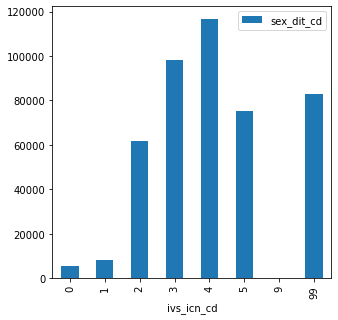

In [77]:
tips_sum_by_day.plot(kind='bar')
plt.show()